# TP3- Part1-Evaluating a Clustering

<b> How many clusters of grain? </b> 

We will use inertia graph to determine the number of clusters. 

What is inertia ? how we compute it ?

The Inertia or within cluster represents the sum of squares value of each sample in a cluster to its cluster center. It gives an indication of how coherent the different clusters are.

**Step1:** Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

**Step2:** Load Data from "data_UFAZ/TP3/Seed_Data.csv".
To construct the data, seven geometric parameters of wheat kernels were measured:

- area A,
- perimeter P,
- compactness C = 4piA/P^2,
- length of kernel,
- width of kernel,
- asymmetry coefficient
- length of kernel groove.

In [2]:
seeds_df = pd.read_csv("Seed_Data.csv")

In [3]:
print(seeds_df)

         A      P       C     LK     WK  A_Coef    LKG  target
0    15.26  14.84  0.8710  5.763  3.312   2.221  5.220       0
1    14.88  14.57  0.8811  5.554  3.333   1.018  4.956       0
2    14.29  14.09  0.9050  5.291  3.337   2.699  4.825       0
3    13.84  13.94  0.8955  5.324  3.379   2.259  4.805       0
4    16.14  14.99  0.9034  5.658  3.562   1.355  5.175       0
..     ...    ...     ...    ...    ...     ...    ...     ...
205  12.19  13.20  0.8783  5.137  2.981   3.631  4.870       2
206  11.23  12.88  0.8511  5.140  2.795   4.325  5.003       2
207  13.20  13.66  0.8883  5.236  3.232   8.315  5.056       2
208  11.84  13.21  0.8521  5.175  2.836   3.598  5.044       2
209  12.30  13.34  0.8684  5.243  2.974   5.637  5.063       2

[210 rows x 8 columns]


**Step 3:** For each of the given values of k, perform the following steps:
 - Create a KMeans instance called model with k clusters.
 - Fit the model to the grain data samples.
 - Append the value of the inertia_ attribute of model to the list inertias. 

In [4]:
inertias = []
ks = range(1, 11)
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(seeds_df)
    inertias.append(model.inertia_)

C:\Users\Hasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

**Step4:** Plot ks Versus inertias

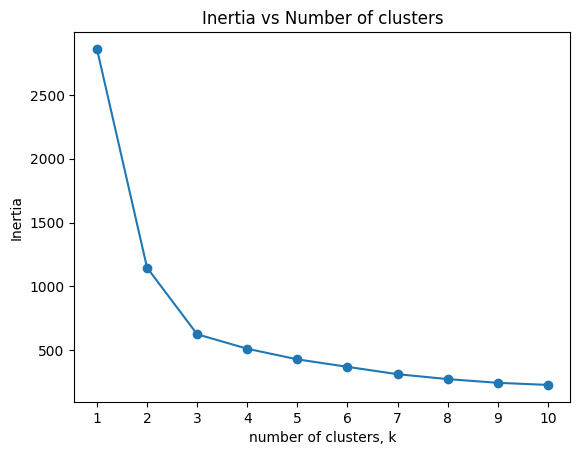

In [5]:
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of clusters')
plt.xticks(ks)
plt.show()

To find the optimal K for a dataset, use the Elbow method; find the point where the decrease in inertia begins to slow. This point is known as the "Elbow point"

That is means, If the distance between instances and the center of the cluster is greater, the instances are in the wrong cluster.  

**Step 5:** Create a KMeans model called model with 3 clusters.

In [6]:
model = KMeans(n_clusters=3)

**Step 6:** Use fit_predict to fit model and obtain cluster labels: labels.

In [7]:
labels = model.fit_predict(seeds_df)

C:\Users\Hasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


**Step7:** Create a DataFrame with clusters and varieties (target) as columns: df

In [8]:
varieties = seeds_df['target'] 

In [9]:
df = pd.DataFrame({'labels': labels, 'varieties': varieties}) 
df.head()

,labels,varieties
0,2,0
1,2,0
2,2,0
3,2,0
4,2,0


**Step 8:** Create crosstab: ct (confusion matrix) u

In [10]:
ct = pd.crosstab(df['labels'], df['varieties'])

**Step 9:**  Display the confusion matrix

In [11]:
print("Confusion Matrix:")
print(ct)

Confusion Matrix:
varieties   0   1   2
labels               
0           1  60   0
1           5   0  70
2          64  10   0


**Step 10:** optional show confusion matrix using seaborn, a library for statistical data visualization

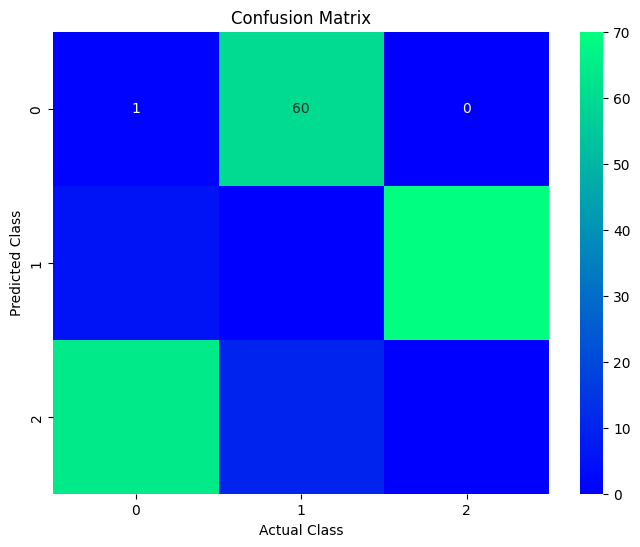

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(ct, annot=True, cmap='winter', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.show()